# Former Version

In [1]:
import pandas as pd

df = pd.read_parquet("hf://datasets/Adelante/arabic-qa-largebatch/data/train-00000-of-00001.parquet")

In [2]:
df

,year,month,date,page,slice,text,containing,问题1-数字,问题2-数字,问题3-数字,...,问题9-数字,问题1-文字,问题2-文字,问题3-文字,问题4-文字,问题5-文字,问题6-文字,问题7-文字,问题8-文字,问题9-文字
0,2010,12,1,1,1,\nسه. .سد ٠٢٨٠،\n٢٠سضسجة ١٤٣١ ه-١سبر (صناول)٢ ...,"[{'ar': 'انتخابات', 'zh': '选举'}, {'ar': 'العدا...",4,6,7,...,2,中立,选举,其他,其他,经济改革与政策调整,其他,其他,政府部门及政府官员,低
1,2010,12,1,1,2,عنى النتيجة\nوعنى جانب اخر اعرب مجلس الوزرا، ...,"[{'ar': 'انتخابات', 'zh': '选举'}, {'ar': 'الرئي...",3,6,1,...,2,中度负面,选举,失业与经济困境,其他,其他,法律与宪法改革,经济改革与政策调整,政府部门及政府官员,低
2,2010,12,1,2,2,***** فرعود الذمى\nيومبا رحلات الغذاء\nمع النح...,"[{'ar': 'انتخابات', 'zh': '选举'}, {'ar': 'العدا...",3,6,7,...,2,中度负面,选举,其他,其他,其他,其他,其他,政府部门及政府官员,低
3,2010,12,1,2,3,ان اللجنة حرحت عنى تنفيذ القانون والاحكام\nالف...,"[{'ar': 'انتخابات', 'zh': '选举'}, {'ar': 'الرئي...",3,6,1,...,2,中度负面,选举,失业与经济困境,其他,经济改革与政策调整,法律与宪法改革,其他,政府部门及政府官员,低
4,2010,12,1,2,5,ممعرية ومحطات التليفزيون\nالمحلية والغضانية\nا...,"[{'ar': 'الدستور', 'zh': '宪法'}, {'ar': 'سلطة',...",4,6,7,...,2,中立,选举,其他,其他,国家安全与社会稳定,经济改革与政策调整,其他,政府部门及政府官员,低
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28235,2011,12,31,21,5,عام ٢٠١١\n- أض رفيع نحدث عن آسدا ب ارتفاع معد...,"[{'ar': 'الشرطة', 'zh': '警察'}, {'ar': 'ثورة', ...",1,1,2,...,4,极其负面,失业与经济困境,社会不公与腐败,其他,国家安全与社会稳定,经济改革与政策调整,其他,政府部门及政府官员,高
28236,2011,12,31,21,6,أن بوابر [ ازسات ند بدأت مالفكل فى الظهير معد ...,"[{'ar': 'الشرطة', 'zh': '警察'}, {'ar': 'الشباب'...",3,1,2,...,4,中度负面,失业与经济困境,社会不公与腐败,其他,国家安全与社会稳定,经济改革与政策调整,其他,政府部门及政府官员,高
28237,2011,12,31,21,7,ى نطاهات\nسوى الثمعير بالأمن. مشيرا إر أمها أص...,"[{'ar': 'ثورة', 'zh': '革命'}, {'ar': 'فساد', 'z...",3,2,1,...,4,中度负面,社会不公与腐败,失业与经济困境,其他,法律与宪法改革,国家安全与社会稳定,其他,政府部门及政府官员,高
28238,2011,12,31,22,1,اسه ٣١ ديسمبر ٢٠١١\n1\nاسل ١٠:٣/٢٢/؛\nالثور٢١/...,"[{'ar': 'انتخابات', 'zh': '选举'}, {'ar': 'ثورة'...",3,1,2,...,4,中度负面,失业与经济困境,社会不公与腐败,其他,国家安全与社会稳定,经济改革与政策调整,其他,政府部门及政府官员,高


# Analysis 1
在某情感下的主题分布

In [3]:
sentiment = '中度正面'
subdf = df[df['问题1-文字'] == sentiment]
print(f"情感为{sentiment}时，民生部分主题分布：")
for theme in set(df['问题3-文字']):
    if theme == '0':
        continue
    cnt = (subdf['问题2-文字'].tolist().count(theme))
    if len(theme) < 5:
        theme += "     "
    print(theme,'\t',cnt,'\t/',len(subdf),' = ',int(cnt/len(subdf)*1000) / 10,'%')

情感为中度正面时，民生部分主题分布：
失业与经济困境 	 125 	/ 222  =  56.3 %
社会不公与腐败 	 2 	/ 222  =  0.9 %
其他      	 44 	/ 222  =  19.8 %
选举      	 25 	/ 222  =  11.2 %
基本公共服务缺失 	 9 	/ 222  =  4.0 %
埃及革命      	 3 	/ 222  =  1.3 %
人权与自由 	 14 	/ 222  =  6.3 %


# Analysis 2
在某主题下的情感分布

In [4]:
theme = '埃及革命'
subdf = df[df['问题2-文字'] == theme]
print(f"主题为{theme}时，情感分布：")
for sentiment in set(df['问题1-文字']):
    if sentiment == '0':
        continue
    cnt = (subdf['问题1-文字'].tolist().count(sentiment))
    if len(sentiment) == 2:
        sentiment += '    '
    print(sentiment,'\t',cnt,'\t/',len(subdf),' = ',int(cnt/len(subdf)*1000) / 10,'%')

主题为埃及革命时，情感分布：
中立     	 83 	/ 2118  =  3.9 %
中度正面 	 3 	/ 2118  =  0.1 %
极其负面 	 1078 	/ 2118  =  50.8 %
强烈正面 	 7 	/ 2118  =  0.3 %
强烈负面 	 60 	/ 2118  =  2.8 %
中度负面 	 887 	/ 2118  =  41.8 %


# Analysis 3 
关键词共现 co-occurrence

In [36]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# 提取所有关键词
all_keywords = sorted(set(keyword['zh'] for sublist in df['containing'] for keyword in sublist))
print(all_keywords, len(all_keywords))
# 初始化共现矩阵
co_occurrence_matrix = pd.DataFrame(0, index=all_keywords, columns=all_keywords)

# 填充共现矩阵
for sublist in tqdm(df['containing']):
    for i in range(len(sublist)):
        for j in range(i+1, len(sublist)):
            co_occurrence_matrix.loc[sublist[i]['zh'], sublist[j]['zh']] += 1
            co_occurrence_matrix.loc[sublist[j]['zh'], sublist[i]['zh']] += 1

# 自己与自己共现次数 不必考虑
for keyword in all_keywords:
    co_occurrence_matrix.loc[keyword, keyword] = 0


['价格', '养老金', '动荡', '医院', '反对派', '团结', '大学', '失业', '安全', '宪法', '工人', '广场', '总统', '抗议', '抵抗', '改革', '政变', '政治', '暴力', '权利', '权力', '正义', '民主', '民族团结', '法院', '烈士', '独立', '示威', '社会公正', '种族的', '紧急状态', '罢工', '联盟', '腐败', '自由', '自由与正义', '警察', '贫穷', '起义', '选举', '通胀', '通货膨胀', '青年', '面包', '革命', '革命青年', '骚乱'] 47


  9%|▉         | 2522/28240 [00:04<00:42, 601.48it/s]


KeyboardInterrupt: 

In [ ]:
co_occurrence_matrix

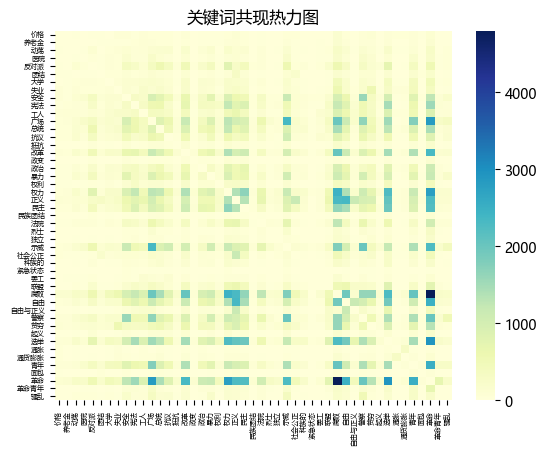

<Figure size 400000x320000 with 0 Axes>

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

ax = sns.heatmap(co_occurrence_matrix, annot=False, cmap="YlGnBu", xticklabels=True, yticklabels=True)
plt.title("关键词共现热力图")

# 旋转x轴和y轴标签
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=5)  # 旋转x轴标签，字体大小8
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=5)   # 保持y轴标签垂直，字体大小8

# 设置热力图大小
plt.figure(figsize=(200, 160),dpi=2000)

# 设置中文字体（假设你有一个支持中文的字体文件路径，如 'SimHei.ttf'）
plt.rcParams['font.family'] = 'Microsoft YaHei'

plt.show()

In [8]:
import plotly.express as px
import numpy as np
import pandas as pd


# 计算每个关键词的共现总次数
total_co_occurrence = co_occurrence_matrix.sum(axis=1) + co_occurrence_matrix.sum(axis=0)

# 根据共现总次数对关键词排序
sorted_indices = total_co_occurrence.sort_values(ascending=False).index
sorted_matrix = co_occurrence_matrix.loc[sorted_indices, sorted_indices]

# 使用 Plotly 绘制热力图
fig = px.imshow(sorted_matrix, labels=dict(x="关键词", y="关键词", color="共现频次"), color_continuous_scale=['#39C5BB',"#0000FF"])

# 更新布局以增强交互性
fig.update_xaxes(side="top")  # 将x轴放在顶部
fig.update_layout(
    title="关键词共现关系热力图",
    xaxis_nticks=47,  # 确保显示所有x轴标签
    yaxis_nticks=47,  # 确保显示所有y轴标签
    autosize=False,
    width=1000,  # 图像宽度
    height=1000,  # 图像高度
)

fig.update_xaxes(tickangle=300)  # 旋转 x 轴标签 45 度
fig.update_yaxes(tickangle=0)   # 保持 y 轴标签垂直（0 度）

fig.show()
fig.write_html("heatmap.html")


# New Update: Seperate into 4 time phase

In [3]:
# 定义时间范围
start_date = '2011-02-03'
end_date = '2011-02-11'
phase = 4

df.rename(columns={'date': 'day'}, inplace=True)

# 将 year, month, day 合并为一个新的 datetime 列
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day']])



# 筛选数据
subdf = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

In [5]:
from tqdm import tqdm
# 提取所有关键词
all_keywords = sorted(set(keyword['zh'] for sublist in subdf['containing'] for keyword in sublist))
print(all_keywords, len(all_keywords))
# 初始化共现矩阵
co_occurrence_matrix = pd.DataFrame(0, index=all_keywords, columns=all_keywords)

# 填充共现矩阵
for sublist in tqdm(subdf['containing']):
    for i in range(len(sublist)):
        for j in range(i+1, len(sublist)):
            co_occurrence_matrix.loc[sublist[i]['zh'], sublist[j]['zh']] += 1
            co_occurrence_matrix.loc[sublist[j]['zh'], sublist[i]['zh']] += 1

# 自己与自己共现次数 不必考虑
for keyword in all_keywords:
    co_occurrence_matrix.loc[keyword, keyword] = 0

['价格', '养老金', '动荡', '医院', '反对派', '团结', '大学', '失业', '安全', '宪法', '工人', '广场', '总统', '抗议', '抵抗', '改革', '政变', '政治', '暴力', '权利', '权力', '正义', '民主', '民族团结', '法院', '烈士', '独立', '示威', '社会公正', '种族的', '紧急状态', '罢工', '联盟', '腐败', '自由', '警察', '贫穷', '起义', '选举', '通货膨胀', '青年', '面包', '革命', '骚乱'] 44


100%|██████████| 751/751 [00:02<00:00, 350.19it/s]


In [6]:
import plotly.express as px
import numpy as np
import pandas as pd


# 计算每个关键词的共现总次数
total_co_occurrence = co_occurrence_matrix.sum(axis=1) + co_occurrence_matrix.sum(axis=0)

# 根据共现总次数对关键词排序
sorted_indices = total_co_occurrence.sort_values(ascending=False).index
sorted_matrix = co_occurrence_matrix.loc[sorted_indices, sorted_indices]
# 使用 Plotly 绘制热力图

color_scale = [
    [0.0, 'blue'],   # 0% - 25% 的数据为蓝色
    [0.25, 'blue'],
    [0.25, 'green'], # 25% - 50% 的数据为绿色
    [0.5, 'green'],
    [0.5, 'yellow'], # 50% - 75% 的数据为黄色
    [0.75, 'yellow'],
    [0.75, 'red'],   # 75% - 100% 的数据为红色
    [1.0, 'red']
]

color_scale = [
    [0.0, 'white'],    # 起始颜色（0%）
    [0.0001,'blue'],
    [0.25, 'green'],  # 渐变到绿色
    [0.75, 'yellow'], # 
    [1.0, 'red']      # 结束颜色
]


fig = px.imshow(sorted_matrix, labels=dict(x="关键词", y="关键词", color="共现频次"), color_continuous_scale=color_scale)

# 更新布局以增强交互性
fig.update_xaxes(side="top")  # 将x轴放在顶部
fig.update_layout(
    title="关键词共现关系热力图",
    xaxis_nticks=47,  # 确保显示所有x轴标签
    yaxis_nticks=47,  # 确保显示所有y轴标签
    autosize=False,
    width=1000,  # 图像宽度
    height=1000,  # 图像高度
)

fig.update_xaxes(tickangle=300)  # 旋转 x 轴标签 45 度
fig.update_yaxes(tickangle=0)   # 保持 y 轴标签垂直（0 度）
fig.show()
fig.write_html("heatmap_time"+str(phase)+".html")
